# Problem Statement

### Identify a pattern of customers based on their spend score in a shopping Mall using Hierarchical clustering.

- You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.

- Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

- `To Find :` You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.



## Importing Libraries

In [63]:

import matplotlib.pyplot as plt
import chart_studio.plotly as py
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns

# Data Preparation

In [64]:
# Data Loading
customer_data = pd.read_csv('Mall_Customers.csv')

In [65]:
customer_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [66]:
# shape of dataframe
customer_data.shape

(200, 5)

In [67]:
# Information of Dataframe
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [68]:
#Stastical Review of data
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Preprocessing 

In [69]:
#Null Count 
customer_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [70]:
# Finding Duplicate data 
duplicate = customer_data[customer_data.duplicated(keep='last')]
len(duplicate)


0

In [71]:
#One Hot Encoding 
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)
data_new = ohe.fit_transform(customer_data[['Genre']])


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [72]:
customer_data['Gender'] = data_new
# Drop a single column
customer_data = customer_data.drop('Genre', axis=1)

In [73]:
customer_data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


## Exploratory Data Analysis

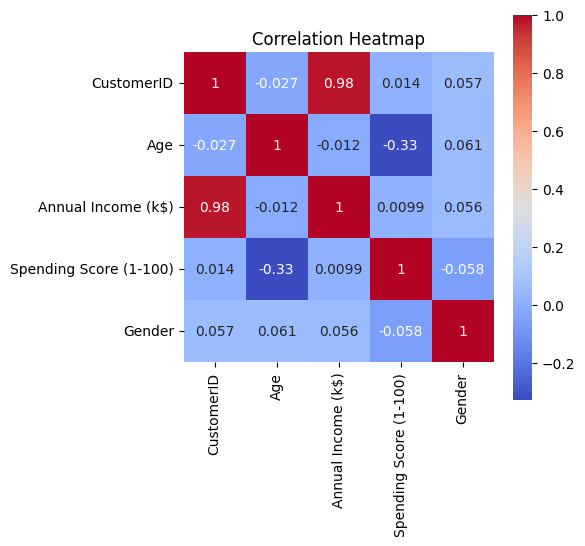

In [74]:
# checking  correlation coefficients to see which variables are highly correlated
# Computing correlation 
corr_data = customer_data.corr()

# Create a correlation heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

From above correlation graph will conclude that ,`CustomerID`,`Gender` these features of no use for our model. So we will drop these features from our dataset.

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

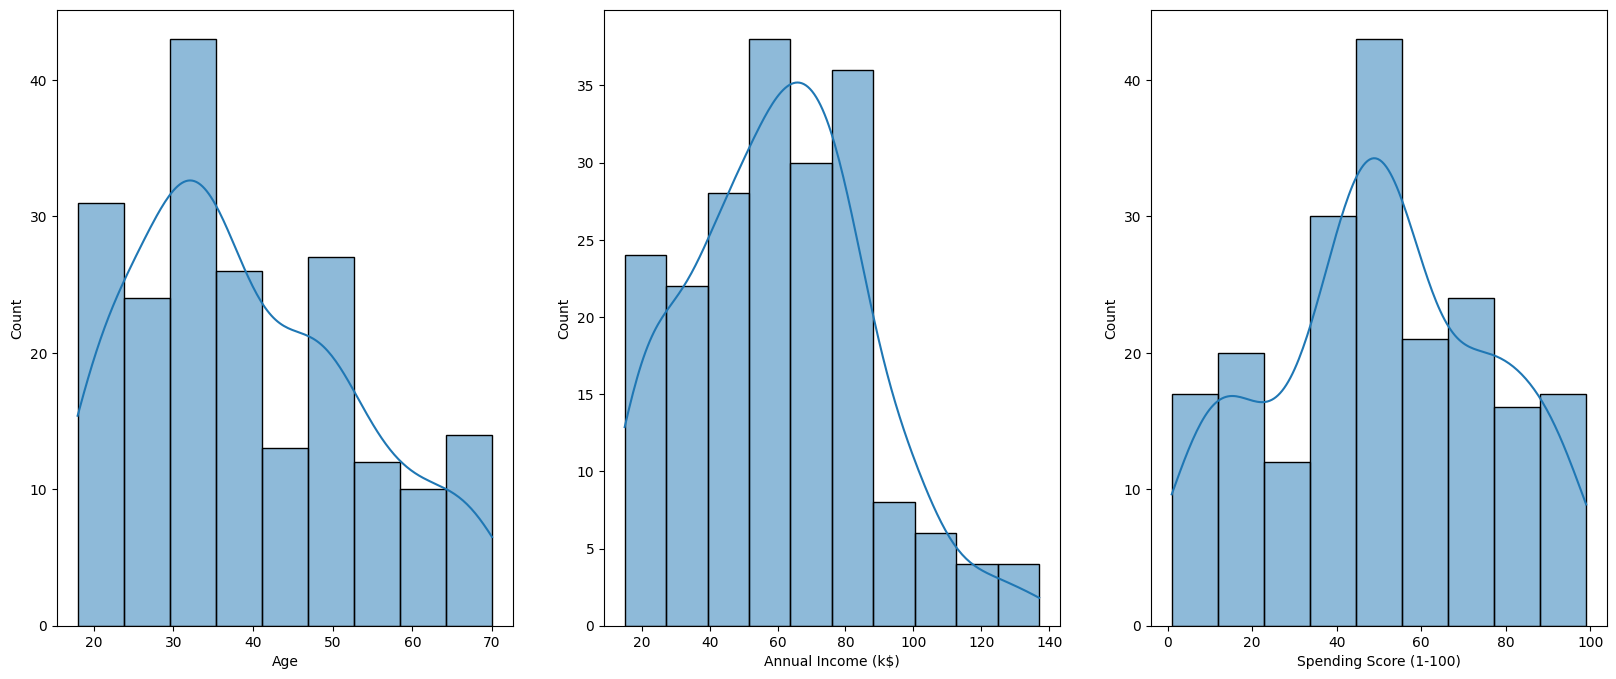

In [75]:
# distribution plots
plt.figure(figsize = (20, 8))                      
plt.subplot(1,3,1)                                    #plt.subplot(no_row,no_columns,fig_no)
sns.histplot(customer_data['Age'] , kde=True)                    #sns.distplot(df[column_name])
plt.subplot(1,3,2)
sns.histplot(customer_data['Annual Income (k$)'], kde=True)
plt.subplot(1,3,3)
sns.histplot(customer_data['Spending Score (1-100)' ], kde=True)



### Graphs Summary
- Age group near 30-40 have the highest density.
- Most customers have income in range of 50-80k.
- Most of the customers have spending score of 50.

C:\Users\Acer\AppData\Local\Temp\ipykernel_19384\2378464369.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_data['Age'])                    #sns.distplot(df[column_name])
C:\Users\Acer\AppData\Local\Temp\ipykernel_19384\2378464369.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

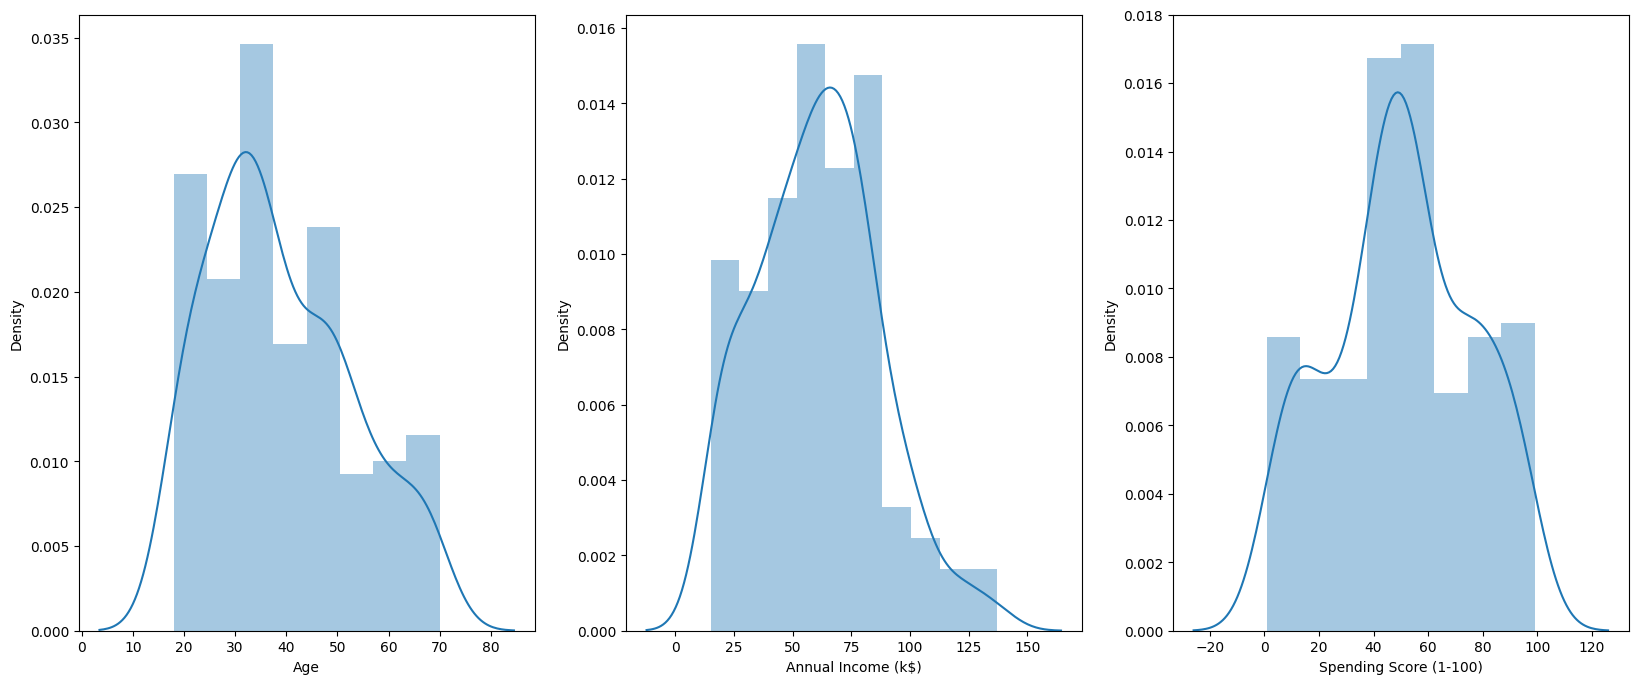

In [76]:
# distribution plots
plt.figure(figsize = (20, 8))                      
plt.subplot(1,3,1)                                    #plt.subplot(no_row,no_columns,fig_no)
sns.distplot(customer_data['Age'])                    #sns.distplot(df[column_name])
plt.subplot(1,3,2)
sns.distplot(customer_data['Annual Income (k$)'])
plt.subplot(1,3,3)
sns.distplot(customer_data['Spending Score (1-100)' ])


## Building the Hierarchical Clustering model

In [77]:
#Final Data after preprocessing
data = customer_data.iloc[:, 1:4].values
data

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

#### Dendogram 
`A dendrogram is a visual representation of hierarchical relationships between objects or entities.`
`Dendrograms are commonly used in clustering analysis to identify groups of similar objects and understand the structure of data.`

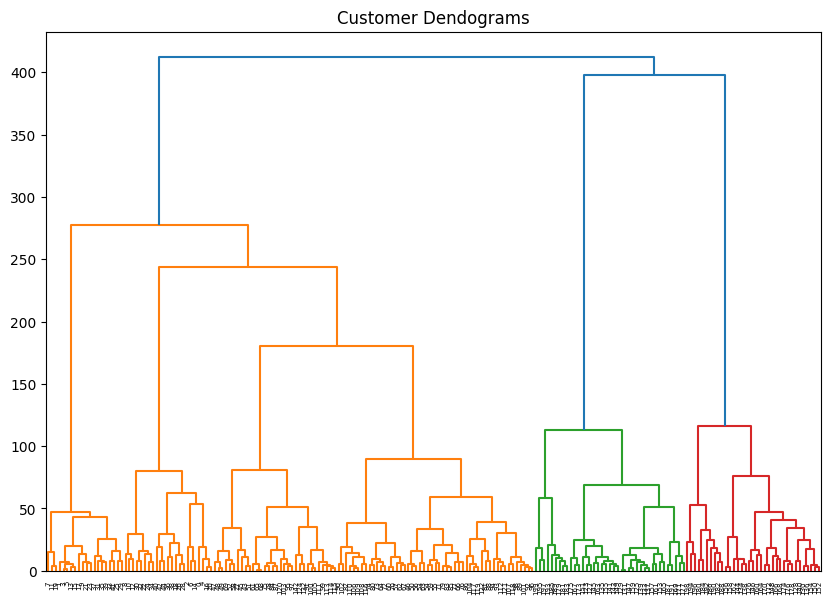

In [78]:
# Creating Dendogram from Dataset
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward' ))

## The idea is shown in the following figure. Here the optimal number of clusters could be 5.



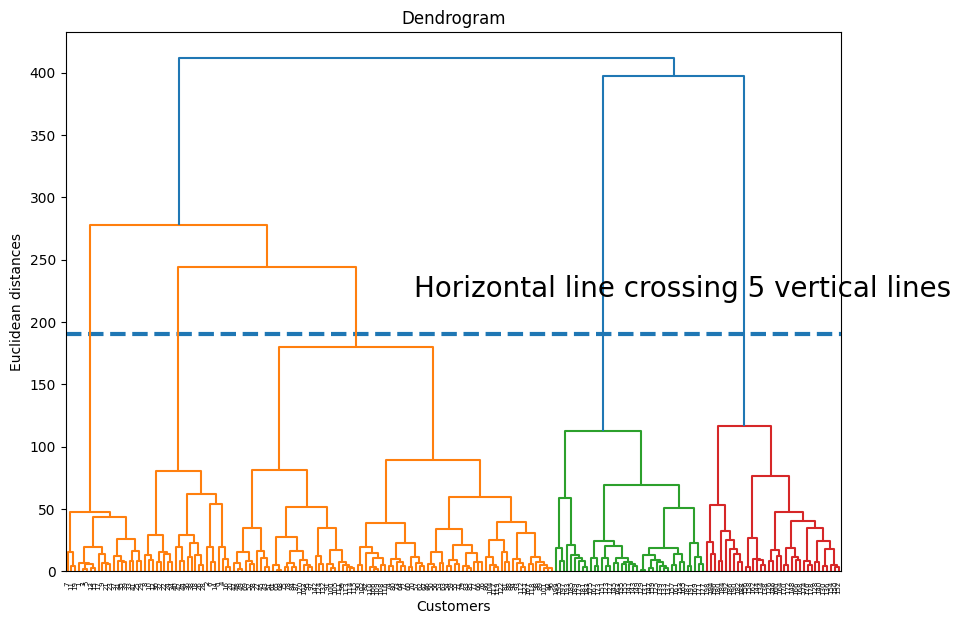

In [79]:
plt.figure(figsize=(10,7))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.hlines(y=190,xmin=0,xmax=2000,lw=3,linestyles='--')    # plt.hlines(y=y-coordinate,xmin=starting pt on x,xmax=end point,lw=line width,linestyles='--') 
plt.text(x=900,y=220,s='Horizontal line crossing 5 vertical lines',fontsize=20)  #plt.text(x=x cpordinate,y=y-coordinate,s='Text',fontsize=20)
dendrogram = shc.dendrogram(shc.linkage(data, method = 'ward'))
plt.show()

## Comparision between different linkage method 


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


<Axes: title={'center': 'Clustering Using Average Linkage'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

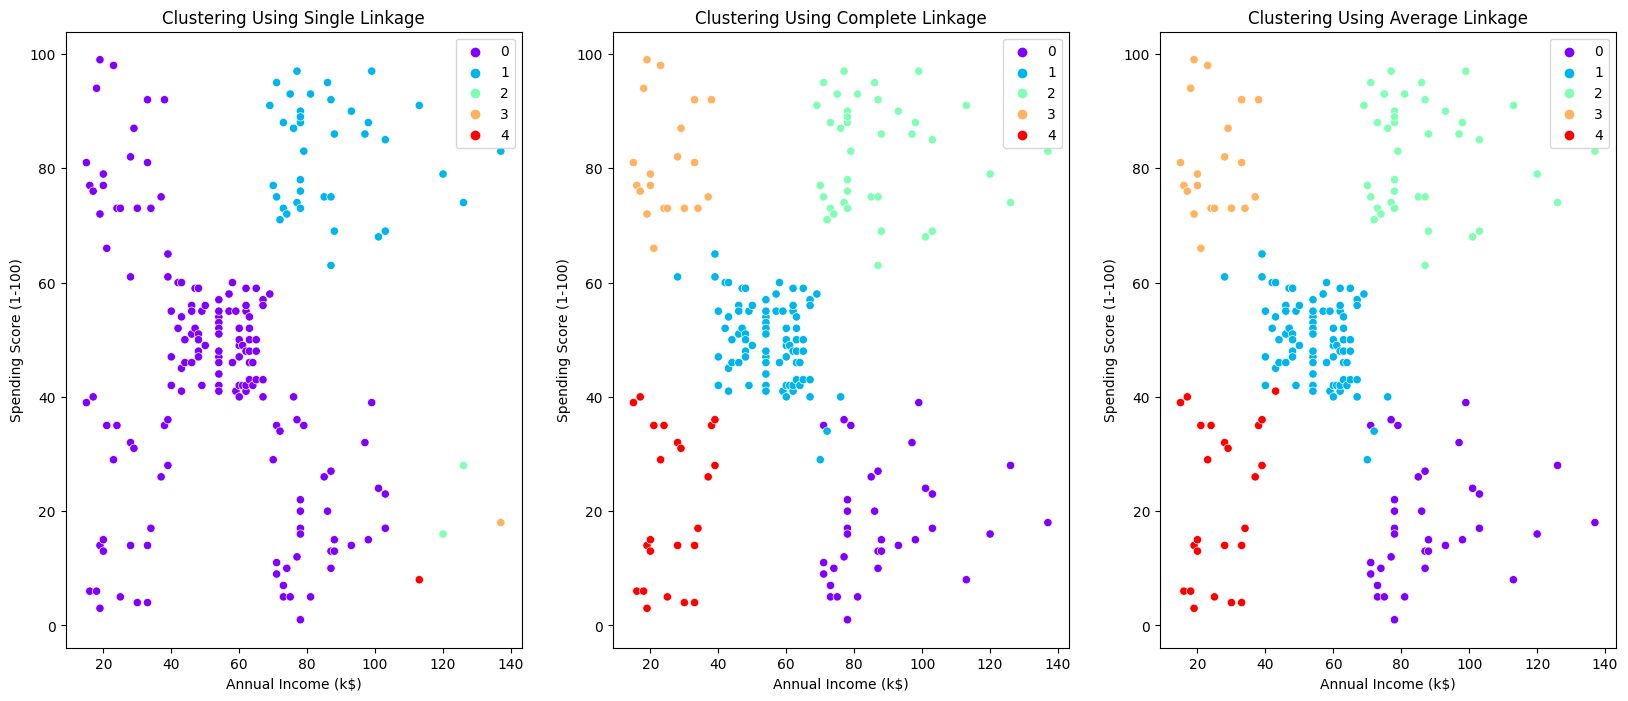

In [80]:
from sklearn.cluster import AgglomerativeClustering
cluster_single = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single' )
prediction_single = cluster_single.fit_predict(data)

#Clustering using average linkage
cluster_complete = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete' )
prediction_complete = cluster_complete.fit_predict(data)

#Clustering using average linkage
cluster_average = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average' )
prediction_average = cluster_average.fit_predict(data)


# distribution plots
plt.figure(figsize = (20, 8))   
plt.subplot(1,3,1)      
plt.title('Clustering Using Single Linkage')                                           
sns.scatterplot(y = "Spending Score (1-100)" , x= "Annual Income (k$)" , data = customer_data , hue = prediction_single , palette="rainbow")
plt.subplot(1,3,2)
plt.title('Clustering Using Complete Linkage')  
sns.scatterplot(y = "Spending Score (1-100)" , x= "Annual Income (k$)" , data = customer_data , hue = prediction_complete , palette="rainbow")
plt.subplot(1,3,3)
plt.title('Clustering Using Average Linkage')  
sns.scatterplot(y = "Spending Score (1-100)" , x= "Annual Income (k$)" , data = customer_data , hue = prediction_average , palette="rainbow")


In [81]:
# Training Model using AgglomerativeClustering and ward linkage method
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward' ,)
cluster.fit(data)

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [82]:
# prediction Output 
prediction = cluster.fit_predict(data)
print(prediction)

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 0 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


### Scatter Plot `Before` and `After` Clustering 

C:\Users\Acer\AppData\Local\Temp\ipykernel_19384\1000528200.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(y = "Spending Score (1-100)" , x= "Annual Income (k$)" , data = customer_data   , palette="rainbow")


<Axes: title={'center': 'Scatter Plot After clustering'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

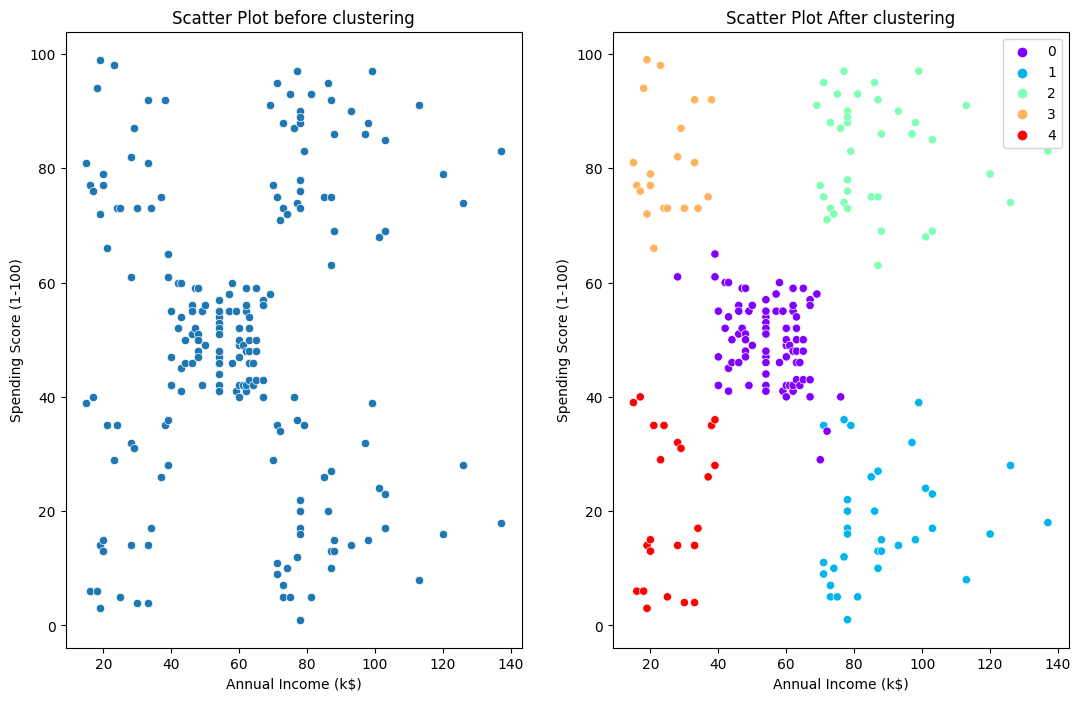

In [83]:

plt.figure(figsize = (20,8))   
# Scatter Plot before clustering
plt.subplot(1,3,1) 
plt.title('Scatter Plot before clustering') 
sns.scatterplot(y = "Spending Score (1-100)" , x= "Annual Income (k$)" , data = customer_data   , palette="rainbow")
### Scatter Plot after clustering
plt.subplot(1,3,2)
plt.title('Scatter Plot After clustering') 
sns.scatterplot(y = "Spending Score (1-100)" , x= "Annual Income (k$)" , data = customer_data , hue = prediction , palette="rainbow")


In [84]:
#This data contains x-axis and y-axis data
graph_data = data[:,1:3]
#graph_data

### Final clustering Graph (Scatter Graph after clustering)

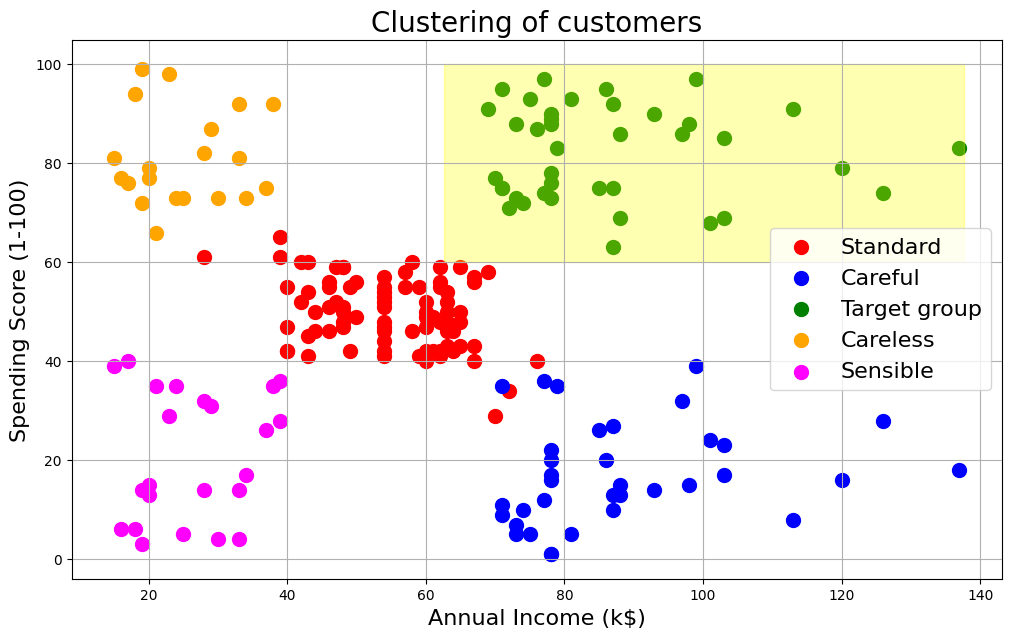

In [85]:
#Final clustering Graph 
plt.figure(figsize=(12,7))
plt.scatter(graph_data[prediction == 0, 0], graph_data[prediction == 0, 1], s = 100, c = 'red', label = 'Standard')
plt.scatter(graph_data[prediction == 1, 0], graph_data[prediction == 1, 1], s = 100, c = 'blue', label = 'Careful')
plt.scatter(graph_data[prediction == 2, 0], graph_data[prediction == 2, 1], s = 100, c = 'green', label = 'Target group')
plt.scatter(graph_data[prediction == 3, 0], graph_data[prediction == 3, 1], s = 100, c = 'orange', label = 'Careless')
plt.scatter(graph_data[prediction == 4, 0], graph_data[prediction == 4, 1], s = 100, c = 'magenta', label = 'Sensible')

plt.title('Clustering of customers',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=16)
plt.ylabel('Spending Score (1-100)',fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.axhspan(ymin=60,ymax=100,xmin=0.4,xmax=0.96,alpha=0.3,color='yellow')
plt.show()

### labels 
   -  `0: "Standard - middle income and middle spenders",`
   -  `1: "Careful - high income but low spenders",`
   -  `2: "Target group - middle-to-high income and high spenders (should be targeted by the mall)",`
   -  `3: "Careless - low income but high spenders (should be avoided because of possible credit risk)",`
   -  `4: "Sensible - low income and low spenders"`
    

# Creating Piechat for Customer Segmentation 

In [86]:
# Specify column names
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df = pd.DataFrame(data , columns=columns)
df['Cluster_Id'] = prediction



In [87]:
# Statistics for ALL Clusters (0-4)
df[['Age', 'Annual Income (k$)','Spending Score (1-100)','Cluster_Id']].groupby('Cluster_Id').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster_Id,,,
0,42.156627,54.759036,49.771084
1,41.685714,88.228571,17.285714
2,32.692308,86.538462,82.128205
3,24.850000,24.950000,81.000000
4,45.217391,26.304348,20.913043


In [88]:
df[['Age', 'Annual Income (k$)','Spending Score (1-100)','Cluster_Id']].groupby('Cluster_Id').describe()

Age                                                        
           count       mean        std   min   25%   50%    75%   max   
Cluster_Id                                                              
0           83.0  42.156627  16.533397  18.0  27.0  45.0  54.00  70.0  \
1           35.0  41.685714  10.897305  19.0  35.0  43.0  47.50  59.0   
2           39.0  32.692308   3.728650  27.0  30.0  32.0  35.50  40.0   
3           20.0  24.850000   5.029126  18.0  21.0  23.0  29.25  35.0   
4           23.0  45.217391  13.228607  19.0  35.5  46.0  53.50  67.0   

           Annual Income (k$)             ...                 
                        count       mean  ...    75%    max   
Cluster_Id                                ...                 
0                        83.0  54.759036  ...  62.00   76.0  \
1                        35.0  88.228571  ...  97.50  137.0   
2                        39.0  86.538462  ...  95.00  137.0   
3                        20.0  24.950000  ...  30.75   38.0   
4                        23.0  26.304348  ...  33.00   39.0   

           Spending Score (1-100)                                           
                            count       mean        std   min   25%   50%   
Cluster_Id                                                                  
0                            83.0  49.771084   6.974387  29.0  44.5  50.0  \
1                            35.0  17.285714  10.211215   1.0  10.0  16.0   
2                            39.0  82.128205   9.364489  63.0  74.5  83.0   
3                            20.0  81.000000   9.514532  66.0  73.0  78.0   
4                            23.0  20.913043  13.017167   3.0   9.5  17.0   

                         
              75%   max  
Cluster_Id               
0           55.00  65.0  
1           23.50  39.0  
2           90.00  97.0  
3           88.25  99.0  
4           33.50  40.0  

[5 rows x 24 columns]

In [89]:
# Printing Count of Values in Each cluster 
df['Cluster_Id'].value_counts()
values_in_cluster = []
for i in df['Cluster_Id'].value_counts():
    values_in_cluster.append(i)

print(values_in_cluster)

print(f"Number of Data Points in Cluster 0 : {values_in_cluster[0]} ")
print(f"Number of Data Points in Cluster 1 : {values_in_cluster[1]} ")
print(f"Number of Data Points in Cluster 2 : {values_in_cluster[2]} ")
print(f"Number of Data Points in Cluster 3 : {values_in_cluster[3]} ")
print(f"Number of Data Points in Cluster 4 : {values_in_cluster[4]} ")





[83, 39, 35, 23, 20]
Number of Data Points in Cluster 0 : 83 
Number of Data Points in Cluster 1 : 39 
Number of Data Points in Cluster 2 : 35 
Number of Data Points in Cluster 3 : 23 
Number of Data Points in Cluster 4 : 20 


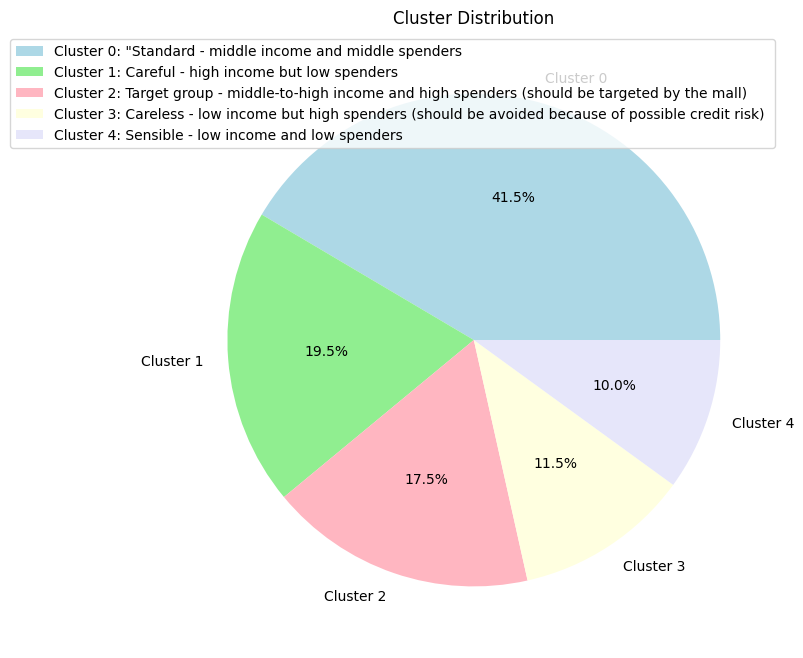

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
# Calculate the count or proportion of data points in each cluster
# cluster_counts = [83, 39, 35 ,23 ,20]  # Example cluster counts
cluster_counts = values_in_cluster #passing list here from above

# Labels for the pie chart
labels = ['Cluster 0' , 'Cluster 1', 'Cluster 2' , 'Cluster 3' , 'Cluster 4']
labels2 = ['Cluster 0: "Standard - middle income and middle spenders' , 'Cluster 1: Careful - high income but low spenders', 'Cluster 2: Target group - middle-to-high income and high spenders (should be targeted by the mall)' , 'Cluster 3: Careless - low income but high spenders (should be avoided because of possible credit risk) ' , 'Cluster 4: Sensible - low income and low spenders']


# Specify colors for each slice
colors = ['#ADD8E6', '#90EE90', '#FFB6C1' ,'#FFFFE0' , '#E6E6FA']

# Create the pie chart
plt.pie(cluster_counts, labels=labels, colors=colors, autopct='%1.1f%%', )

# Add a title
plt.title('Cluster Distribution')
# Add a legend
plt.legend(labels2, loc='best')
#figure Size


# Display the pie chart
plt.show()

In [91]:
# Grouping Data into seperate clusters
group_0= df[df['Cluster_Id']==0]
group_1= df[df['Cluster_Id']==1]
group_2= df[df['Cluster_Id']==2]
group_3= df[df['Cluster_Id']==3]
group_4= df[df['Cluster_Id']==4]



###  Stastical Analysis of cluster (0-4)

In [92]:
print(f'''
Cluster 0 : Stastical Analysis 
Average Age : {round(group_0.mean()['Age'])}
Average Annual Income(K$): {round(group_0.mean()['Annual Income (k$)'])}
Annual Income Range(K$) : {round(group_0.min()['Annual Income (k$)'])}k$ - {round(group_0.max()['Annual Income (k$)'])}K$
Spending Score (1-100): {round(group_0.mean()['Spending Score (1-100)'])}
Spending Score Range in Cluster(K$) : {round(group_0.min()['Spending Score (1-100)'])} - {round(group_0.max()['Spending Score (1-100)'])}


Cluster 1 : Stastical Analysis 
Average Age : {round(group_1.mean()['Age'])}
Average Annual Income(K$): {round(group_1.mean()['Annual Income (k$)'])}
Annual Income Range(K$) : {round(group_1.min()['Annual Income (k$)'])}k$ - {round(group_1.max()['Annual Income (k$)'])}K$
Spending Score (1-100): {round(group_1.mean()['Spending Score (1-100)'])}
Spending Score Range in Cluster(K$) : {round(group_1.min()['Spending Score (1-100)'])} - {round(group_1.max()['Spending Score (1-100)'])}


Cluster 2 : Stastical Analysis 
Average Age : {round(group_2.mean()['Age'])}
Average Annual Income(K$): {round(group_2.mean()['Annual Income (k$)'])}
Annual Income Range(K$) : {round(group_2.min()['Annual Income (k$)'])}k$ - {round(group_2.max()['Annual Income (k$)'])}K$
Spending Score (1-100): {round(group_2.mean()['Spending Score (1-100)'])}
Spending Score Range in Cluster(K$) : {round(group_2.min()['Spending Score (1-100)'])} - {round(group_2.max()['Spending Score (1-100)'])}


Cluster 3 : Stastical Analysis 
Average Age : {round(group_3.mean()['Age'])}
Average Annual Income(K$): {round(group_3.mean()['Annual Income (k$)'])}
Annual Income Range(K$) : {round(group_3.min()['Annual Income (k$)'])}k$ - {round(group_3.max()['Annual Income (k$)'])}K$
Spending Score (1-100): {round(group_3.mean()['Spending Score (1-100)'])}
Spending Score Range in Cluster(K$) : {round(group_3.min()['Spending Score (1-100)'])} - {round(group_3.max()['Spending Score (1-100)'])}


Cluster 4 : Stastical Analysis 
Average Age : {round(group_4.mean()['Age'])}
Average Annual Income(K$): {round(group_4.mean()['Annual Income (k$)'])}
Annual Income Range(K$) : {round(group_4.min()['Annual Income (k$)'])}k$ - {round(group_4.max()['Annual Income (k$)'])}K$
Spending Score (1-100): {round(group_4.mean()['Spending Score (1-100)'])}
Spending Score Range in Cluster(K$) : {round(group_4.min()['Spending Score (1-100)'])} - {round(group_4.max()['Spending Score (1-100)'])}

''')


Cluster 0 : Stastical Analysis 
Average Age : 42
Average Annual Income(K$): 55
Annual Income Range(K$) : 28k$ - 76K$
Spending Score (1-100): 50
Spending Score Range in Cluster(K$) : 29 - 65


Cluster 1 : Stastical Analysis 
Average Age : 42
Average Annual Income(K$): 88
Annual Income Range(K$) : 71k$ - 137K$
Spending Score (1-100): 17
Spending Score Range in Cluster(K$) : 1 - 39


Cluster 2 : Stastical Analysis 
Average Age : 33
Average Annual Income(K$): 87
Annual Income Range(K$) : 69k$ - 137K$
Spending Score (1-100): 82
Spending Score Range in Cluster(K$) : 63 - 97


Cluster 3 : Stastical Analysis 
Average Age : 25
Average Annual Income(K$): 25
Annual Income Range(K$) : 15k$ - 38K$
Spending Score (1-100): 81
Spending Score Range in Cluster(K$) : 66 - 99


Cluster 4 : Stastical Analysis 
Average Age : 45
Average Annual Income(K$): 26
Annual Income Range(K$) : 15k$ - 39K$
Spending Score (1-100): 21
Spending Score Range in Cluster(K$) : 3 - 40




In [93]:
#Dumping 
import pickle
pickle.dump(cluster,open('model.pkl','wb'))
pickle.dump(data,open('data.pkl','wb'))
